# Análise Udemy/Coursera

O objetivo deste notebook é realizar uma análise comparativa entre as duas plataformas MOOC mais populares no Brasil e comparar os cursos que mais crescem entre eles.

#TODO  
Criar dashboard no **Power BI** ou **Tableau**.  
Usar SQL?

## Importando as bibliotecas

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Polygon

## Importação dos dados

In [105]:
udemy_cursos = pd.read_csv('data/udemy_cursos.csv') # https://www.kaggle.com/datasets/hossaingh/udemy-courses
coursera_cursos = pd.read_csv('data/coursera_cursos.csv') # https://www.kaggle.com/datasets/anasmahmood000/coursera-courses-dataset

In [106]:
udemy_cursos.head(5)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [107]:
coursera_cursos.head(5)

,url,title,associated-university-institution-company,type,image,category-subject-area,certificate-is-available,description,duration,language,level,prerequisites,price,rating,syllabus,timestamp
0,https://www.coursera.org/specializations/netwo...,Networking in Google Cloud Specialization,Google Cloud,specializations,https://s3.amazonaws.com/coursera_assets/meta_...,Networking,Shareable Certificate,This specialization gives participants broad s...,Approximately 4 months to complete,English,Intermediate Level,-,free,4.8,-,2022-07-29T23:58:34Z
1,https://www.coursera.org/learn/2-speed-it,Two Speed IT: How Companies Can Surf the Digit...,CentraleSupélec,course,https://s3.amazonaws.com/coursera_assets/meta_...,Business Essentials,Shareable Certificate,"Transform or disappear, the Darwinism of IT: I...",Approx. 14 hours to complete,English,-,-,free,4.3,Introduction ~.~ Start here! ~.~ IT and the CI...,2022-07-29T23:58:34Z
2,https://www.coursera.org/learn/fundamentals-ne...,Fundamentals of Network Communication,University of Colorado System,course,https://s3.amazonaws.com/coursera_assets/meta_...,Computer Security and Networks,Shareable Certificate,"In this course, we trace the evolution of netw...",Approx. 15 hours to complete,English,Intermediate Level,-,free,4.6,Communication Networks and Services ~.~ This m...,2022-07-29T23:58:54Z
3,https://www.coursera.org/learn/ux-design-jobs,Design a User Experience for Social Good & Pre...,Google,course,https://s3.amazonaws.com/coursera_assets/meta_...,Design and Product,Shareable Certificate,Design a User Experience for Social Good and P...,Approx. 71 hours to complete,English,Beginner Level,-,free,4.8,"Starting the UX design process: empathize, def...",2022-07-29T23:59:20Z
4,https://www.coursera.org/learn/database-applic...,Building Database Applications in PHP,University of Michigan,course,https://s3.amazonaws.com/coursera_assets/meta_...,Mobile and Web Development,Shareable Certificate,"In this course, we'll look at the object orien...",Approx. 24 hours to complete,English,Intermediate Level,-,free,4.9,PHP Objects ~.~ We look at the object oriented...,2022-07-29T23:59:20Z


# Análise Udemy

Nesta seção será realizada a análise do dataset da Udemy

## Análise dos dados

### Analisando o dataset da Udemy

In [108]:
udemy_cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209707 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

In [91]:
udemy_cursos.isna().sum()

id                      0
title                   0
is_paid                 0
price                   0
headline               27
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64

In [93]:
# Altera a maneira que o Pandas mostra as colunas
pd.set_option('display.max_columns', 0) # default:0, None mostra todas as colunas
pd.set_option('display.max_colwidth', 50) # defaul:50, None mostra o conteúdo completo das colunas

In [98]:
udemy_cursos.iloc[[3521]]

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
3521,200824.0,Introduction to JavaScript Object Notation (JSON),True,19.99,Unlisted,4888,4.421053,783,156,20,93,2014-05-19 01:49:26+00:00,2015-11-27,Development,Programming Languages,JSON,English,/course/json-training-a-javascript-object-nota...,Marie Taylor,/user/marietaylor3/


In [111]:
# Converte os tipos de dados
udemy_cursos['num_subscribers'] = udemy_cursos['num_subscribers'].astype(int)
udemy_cursos['num_reviews'] = udemy_cursos['num_reviews'].astype(int)
udemy_cursos['num_comments'] = udemy_cursos['num_comments'].astype(int)
udemy_cursos['num_lectures'] = udemy_cursos['num_lectures'].astype(int)
udemy_cursos['num_lectures'] = udemy_cursos['num_lectures'].astype(int)
udemy_cursos['content_length_min'] = udemy_cursos['content_length_min'].astype(int)
udemy_cursos['published_time'] = pd.to_datetime(udemy_cursos['published_time'], dayfirst=False, errors = 'coerce')
udemy_cursos['last_update_date'] = pd.to_datetime(udemy_cursos['last_update_date'], format='%Y-%m-%d', errors = 'raise')

In [ ]:
# Preenche os campos nulos
udemy_cursos = (udemy_cursos.fillna('Unlisted'))

In [112]:
udemy_cursos.dtypes

id                                float64
title                              object
is_paid                              bool
price                             float64
headline                           object
num_subscribers                     int32
avg_rating                        float64
num_reviews                         int32
num_comments                        int32
num_lectures                        int32
content_length_min                  int32
published_time        datetime64[ns, UTC]
last_update_date           datetime64[ns]
category                           object
subcategory                        object
topic                              object
language                           object
course_url                         object
instructor_name                    object
instructor_url                     object
dtype: object

In [96]:
# Mostra as linhas que possuem campo nulo
udemy_cursos[udemy_cursos['last_update_date'].isna()]

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url


In [12]:
udemy_cursos.columns

Index(['id', 'title', 'is_paid', 'price', 'headline', 'num_subscribers',
       'avg_rating', 'num_reviews', 'num_comments', 'num_lectures',
       'content_length_min', 'published_time', 'last_update_date', 'category',
       'subcategory', 'topic', 'language', 'course_url', 'instructor_name',
       'instructor_url'],
      dtype='object')

In [13]:
# Mostra a quantidade de cursos por categoria
udemy_cursos['category'].value_counts()

Development             31643
IT & Software           30479
Teaching & Academics    26293
Business                24670
Personal Development    21239
Design                  15256
Health & Fitness        11568
Marketing               11221
Lifestyle               10653
Finance & Accounting    10572
Office Productivity      6297
Music                    5977
Photography & Video      3866
Name: category, dtype: int64

In [14]:
# Mostra a quantidade de cursos por idioma
udemy_cursos['language'].value_counts()

English       123921
Portuguese     18471
Spanish        17428
Turkish         8100
Japanese        7006
               ...  
Welsh              1
Frisian            1
Zulu               1
Tatar              1
Faroese            1
Name: language, Length: 79, dtype: int64

### Visualizando o dataset da Udemy

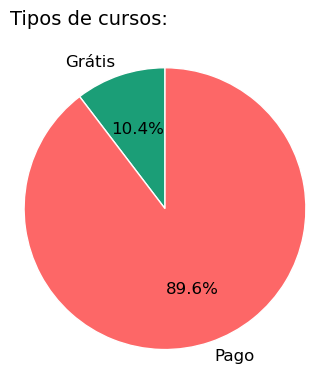

In [16]:
# Visualização em pizza da porcentagem de cursos grátis e pagos.
plt.figure(figsize = (4, 4))
plt.pie(udemy_cursos.groupby(['is_paid']).size(),
        labels = ['Grátis', 'Pago'], 
        autopct = '%1.1f%%',
        startangle = 90, colors = ['#1b9e77','#fd6767'],
        textprops = {'size': 12},
        wedgeprops= {"edgecolor":"white",
                     'linewidth': 1,
                     'antialiased': True})
plt.axis('equal')
plt.title('Tipos de cursos:\n',loc='left', fontdict={'fontsize': 14})
plt.show()

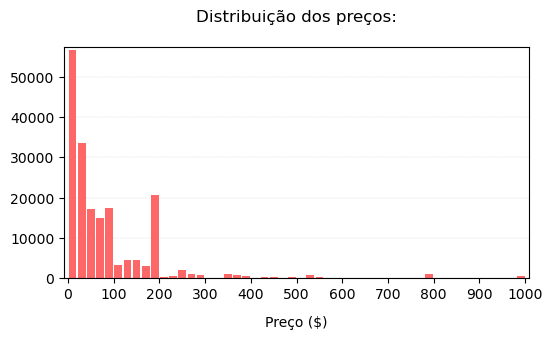

In [151]:
# Distribuição dos preços dos cursos
plt.rcParams.update({'font.size': 10, 'axes.axisbelow': True})
plt.figure(figsize = (6, 3))
plt.hist(udemy_cursos[udemy_cursos['is_paid']==True]['price'],bins=50,range=(0,1000), rwidth=0.85,
         color='#fd6767')
plt.grid(axis='y', color ='Grey',
        linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,1001,100))
plt.margins(0.01)
plt.xlabel("Preço ($)", labelpad=10)
plt.ylabel("")
plt.title('Distribuição dos preços:\n',loc='center', fontdict={'fontsize': 12})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

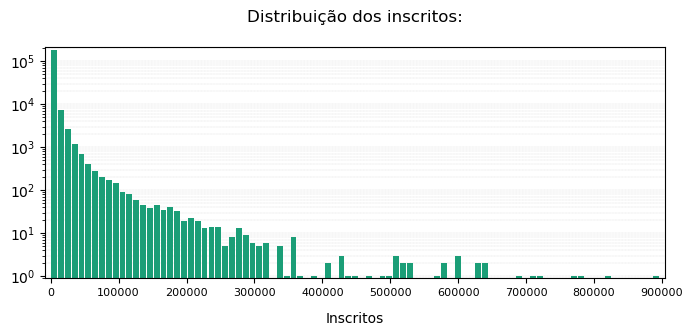

In [150]:
# Distribuição dos inscritos por curso
plt.figure(figsize = (8, 3))
plt.hist(udemy_cursos[(udemy_cursos['num_subscribers']>0) & (udemy_cursos['num_subscribers']<1e6)]['num_subscribers'],bins=89, rwidth=0.85, 
         color='#1b9e77')
plt.grid(axis='y', color ='Grey', which='both',
        linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,1000001,100000))
plt.margins(0.01)
plt.xlabel("Inscritos", labelpad=10)
plt.yscale('log')
plt.title('Distribuição dos inscritos:\n',loc='center')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

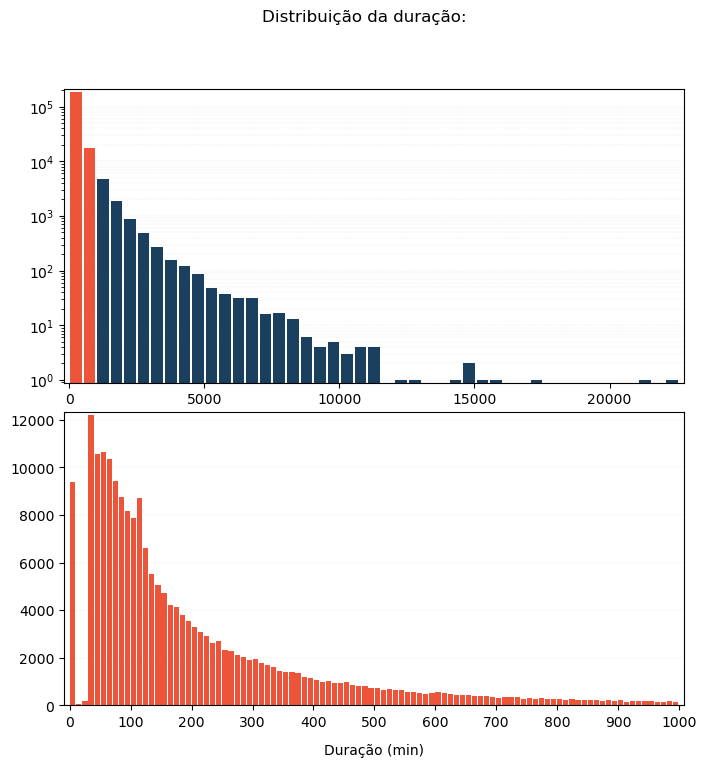

In [19]:
# Distribuição da duração dos cursos
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (8, 8))
N, bins, patches = ax1.hist(udemy_cursos['content_length_min'], rwidth=0.85, bins=45, color='#1a3f5f')

ax1.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1, which='both', alpha = 0.6)
ax1.margins(0.01)

patches[0].set_facecolor('#ed553b')
patches[1].set_facecolor('#ed553b')

plt.sca(ax1)
plt.yscale('log')
plt.ylabel("")

ax2.hist(udemy_cursos[udemy_cursos['content_length_min']<1000]['content_length_min'], rwidth=0.85, bins=100, color='#ed553b')
ax2.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1, alpha = 0.6)
ax2.margins(0.01)

plt.sca(ax2)
plt.xlabel("Duração (min)", labelpad=10)
plt.ylabel("")
plt.xticks(range(0,1001,100))
plt.subplots_adjust(hspace=0.1)
plt.suptitle('Distribuição da duração:')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

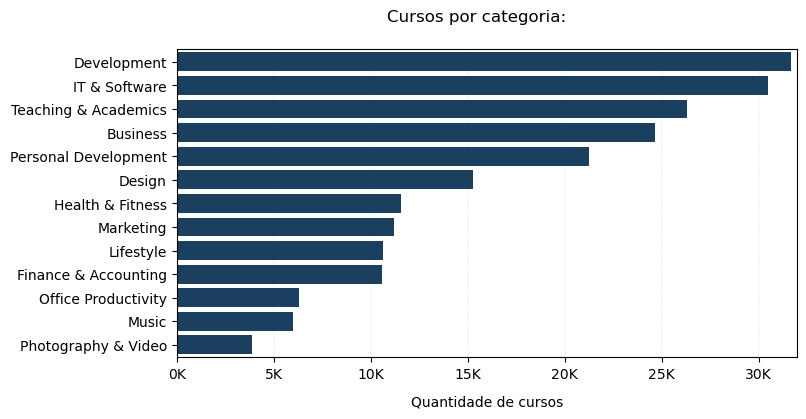

In [20]:
udemy_a = udemy_cursos.groupby(['category']).size().sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.barh(udemy_a.index, udemy_a, color='#1a3f5f')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.margins(0.01)
plt.xlabel("Quantidade de cursos", labelpad=10)
plt.grid(axis='x', color ='Grey',
        linestyle ='-.', linewidth = 0.1)
plt.suptitle('Cursos por categoria:')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)   # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)   # legend fontsize
plt.show()

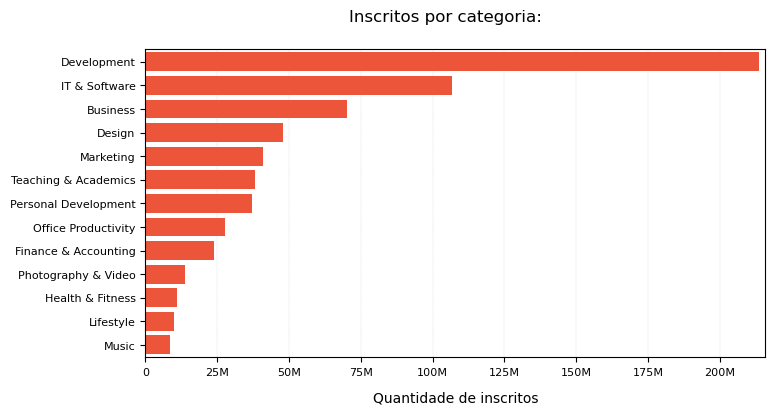

In [21]:
udemy_b = udemy_cursos.groupby(['category']).sum(numeric_only=True).sort_values(by='num_subscribers',ascending=True)
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.barh(udemy_b.index, udemy_b['num_subscribers'], color='#ed553b')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M' if x!=0 else 0))
plt.margins(0.01)
plt.xlabel("Quantidade de inscritos", labelpad=10)
plt.grid(axis='x', color ='Grey',
        linestyle ='-.', linewidth = 0.1)
plt.suptitle('Inscritos por categoria:')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)   # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)   # legend fontsize
plt.show()

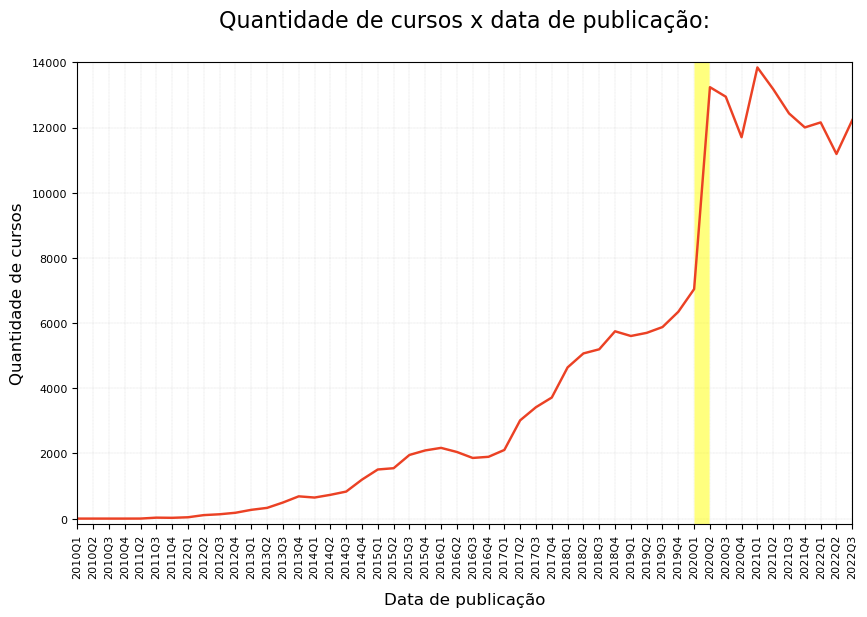

In [22]:
# teste
udemy_cursos['published_QDate'] = pd.PeriodIndex(udemy_cursos.published_time, freq='Q')
udemy_publish = udemy_cursos.groupby(['published_QDate'], as_index=False).size().sort_values(by='published_QDate')
udemy_publish['published_QDate'] = udemy_publish['published_QDate'].apply(str)
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(udemy_publish.index[:-1], udemy_publish['size'][:-1], color='#eb4124', linewidth=1.75)
plt.margins(x=0, y=0.012)
plt.ylabel("Quantidade de cursos", labelpad=5, fontsize=12)
plt.xlabel("Data de publicação", labelpad=10, fontsize=12)
plt.xticks(udemy_publish.index[:-1])
plt.xticks(rotation = 90)

ax.set_xticklabels(list(udemy_publish['published_QDate'][:-1]))
plt.grid(color ='Grey',
        linestyle ='-.', linewidth = 0.1)

# cria uma linha amarela entre os vértices 39 e 40 para destaque
verts = [(udemy_publish.index[39], -1000), (udemy_publish.index[39], udemy_publish['size'][39]+10000), 
         (udemy_publish.index[40], udemy_publish['size'][40]+10000),(udemy_publish.index[40], -1000)]
poly = Polygon(verts, facecolor ='yellow',
               edgecolor ='1.0', alpha = 0.5)
ax.add_patch(poly)

plt.title('Quantidade de cursos x data de publicação:\n',loc='center', fontdict={'fontsize': 16})
plt.show()

In [23]:
udemy_c = (udemy_cursos.groupby(['topic'], as_index=False)
           .size()
           .sort_values(by='size',ascending=False)
           .rename(columns={'topic':'Tópico', 'size':'Quantidade'}))
print('Top 10 tópicos por quantidade de cursos:')
print(udemy_c[:10].to_markdown(tablefmt="rounded_outline", index=False))

Top 10 tópicos por quantidade de cursos:
╭─────────────────────────┬──────────────╮
│ Tópico                  │   Quantidade │
├─────────────────────────┼──────────────┤
│ Python                  │         2553 │
│ Excel                   │         2072 │
│ English Language        │         1495 │
│ WordPress               │         1442 │
│ Math                    │         1341 │
│ Photoshop               │         1294 │
│ Microsoft Certification │         1232 │
│ Java                    │         1128 │
│ JavaScript              │         1092 │
│ Personal Development    │          978 │
╰─────────────────────────┴──────────────╯


In [24]:
udemy_subs = (udemy_cursos.groupby(['topic'], as_index=False)
              .sum(numeric_only=True)
              .sort_values(by='num_subscribers',ascending=False)
              .rename(columns={'topic':'Tópico', 'num_subscribers': 'Inscritos'}))
print('Top 10 tópicos por quantidade de inscritos:')
print(udemy_subs[:10][['Tópico', 'Inscritos']].to_markdown(tablefmt="rounded_outline", index=False,floatfmt=',.0f'))

Top 10 tópicos por quantidade de inscritos:
╭─────────────────────┬─────────────╮
│ Tópico              │   Inscritos │
├─────────────────────┼─────────────┤
│ Python              │    32516280 │
│ Excel               │    12822452 │
│ JavaScript          │    11801744 │
│ Java                │    11203723 │
│ Web Development     │     9293697 │
│ Photoshop           │     8976024 │
│ Ethical Hacking     │     8280273 │
│ WordPress           │     7080627 │
│ CSS                 │     6482557 │
│ Android Development │     5567763 │
╰─────────────────────┴─────────────╯


In [25]:
udemy_cursos['earned'] = udemy_cursos['price']*udemy_cursos['num_subscribers']
print("Total de vendas da Udemy: ", end='')
print(round(udemy_cursos.earned.sum()/1e9,2),'bilhões de dólares')

Total de vendas da Udemy: 59.93 bilhões de dólares


In [26]:
udemy_teacher = udemy_cursos.groupby(['instructor_url'], as_index=False).sum(numeric_only=True)
udemy_teacher2 = (udemy_teacher.sort_values(by='earned',ascending=False)
                  .join(udemy_cursos[['instructor_url', 'instructor_name']].set_index('instructor_url'), on='instructor_url').drop_duplicates()
                  .rename(columns={'instructor_name':'Professor', 'instructor_url':'URL do professor', 'earned':'Lucro'}))
print('Top 10 professores com maior lucro ($):')
print(udemy_teacher2[0:10][['Professor', 'URL do professor', 'Lucro']].to_markdown(tablefmt="rounded_outline", index=False,floatfmt=',.0f'))

Top 10 professores com maior lucro ($):
╭────────────────────────┬─────────────────────────────────────────────┬───────────────╮
│ Professor              │ URL do professor                            │         Lucro │
├────────────────────────┼─────────────────────────────────────────────┼───────────────┤
│ Srinidhi Ranganathan   │ /user/srinidhi-ranganathan/                 │ 1,735,131,640 │
│ Learn Tech Plus        │ /user/josh-werner/                          │ 1,198,360,878 │
│ TJ Walker              │ /user/tjwalker2/                            │ 1,171,615,935 │
│ Jose Portilla          │ /user/joseportilla/                         │   818,904,784 │
│ YouAccel Training      │ /user/youaccel/                             │   801,222,163 │
│ Creative Online School │ /user/mahbubur-rahman-9/                    │   638,075,198 │
│ Robert (Bob) Steele    │ /user/c91d6786-95f3-48d8-ab94-cc92431d2aa4/ │   629,703,391 │
│ Kirill Eremenko        │ /user/kirilleremenko/                      

# Análise Coursera


Nesta seção será realizada a análise do dataset da Coursera

## Análise dos dados

### Analisando o dataset da Coursera

In [27]:
coursera_cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   url                                        242 non-null    object
 1   title                                      242 non-null    object
 2   associated-university-institution-company  242 non-null    object
 3   type                                       242 non-null    object
 4   image                                      242 non-null    object
 5   category-subject-area                      242 non-null    object
 6   certificate-is-available                   242 non-null    object
 7   description                                242 non-null    object
 8   duration                                   242 non-null    object
 9   language                                   242 non-null    object
 10  level                                 

In [28]:
coursera_cursos.isna().sum()

url                                          0
title                                        0
associated-university-institution-company    0
type                                         0
image                                        0
category-subject-area                        0
certificate-is-available                     0
description                                  0
duration                                     0
language                                     0
level                                        0
prerequisites                                0
price                                        0
rating                                       0
syllabus                                     0
timestamp                                    0
dtype: int64

In [29]:
coursera_cursos.dtypes

url                                          object
title                                        object
associated-university-institution-company    object
type                                         object
image                                        object
category-subject-area                        object
certificate-is-available                     object
description                                  object
duration                                     object
language                                     object
level                                        object
prerequisites                                object
price                                        object
rating                                       object
syllabus                                     object
timestamp                                    object
dtype: object

In [30]:
coursera_cursos['rating'].sort_values(ascending=True)

27       -
198      -
171      -
197      -
30       -
      ... 
200    4.9
201    4.9
202    4.9
150    4.9
53     4.9
Name: rating, Length: 242, dtype: object

In [31]:
coursera_cursos['rating'] = coursera_cursos['rating'].replace(to_replace='-', value='0')

In [32]:
coursera_cursos['rating'] = coursera_cursos['rating'].astype(float)

In [33]:
coursera_cursos['rating'].sort_values(ascending=True)

27     0.0
198    0.0
171    0.0
197    0.0
30     0.0
      ... 
200    4.9
201    4.9
202    4.9
150    4.9
53     4.9
Name: rating, Length: 242, dtype: float64

In [34]:
coursera_cursos.dtypes

url                                           object
title                                         object
associated-university-institution-company     object
type                                          object
image                                         object
category-subject-area                         object
certificate-is-available                      object
description                                   object
duration                                      object
language                                      object
level                                         object
prerequisites                                 object
price                                         object
rating                                       float64
syllabus                                      object
timestamp                                     object
dtype: object

In [37]:
coursera_cursos['timestamp'] = pd.to_datetime(coursera_cursos['timestamp'], dayfirst=False, errors = 'coerce')

In [42]:
coursera_cursos.dtypes

url                                                       object
title                                                     object
associated-university-institution-company                 object
type                                                      object
image                                                     object
category-subject-area                                     object
certificate-is-available                                  object
description                                               object
duration                                                  object
language                                                  object
level                                                     object
prerequisites                                             object
price                                                     object
rating                                                   float64
syllabus                                                  object
timestamp                